In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib import axes
import seaborn as sns
import warnings
%matplotlib inline
from sklearn import datasets, linear_model
from scipy.stats import ttest_ind
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('movie_sta_full.csv',sep=';')
df.head(4)

,mv_id,publish_date,genre_id,genre_name,med_rating,imdb_rating,vote_count,budget,revenue,languages,keywords,co_id,star_count
0,tt0035423,2001-12-25,435,Fantasy,44,6.4,73773,"$48,000,000",$47121859,English French,"time travel,brooklyn bridge,bridge,time travel...",co0010901,3
1,tt0035423,2001-12-25,435,Fantasy,44,6.4,73773,"$48,000,000",$47121859,English French,"time travel,brooklyn bridge,bridge,time travel...",co0022594,3
2,tt0069049,2018-11-02,430,Drama,78,6.9,4246,NaN,NaN,English,"film business,nudity,female nudity,ice cube,baron",co0054085,2
3,tt0069049,2018-11-02,430,Drama,78,6.9,4246,NaN,NaN,English,"film business,nudity,female nudity,ice cube,baron",co0055813,2


In [3]:
df=df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df['publish_year'] = pd.to_datetime(df['publish_date']).apply(lambda x: x.year)
df['publish_month'] = pd.to_datetime(df['publish_date']).apply(lambda x: x.month)
df['revenue'] = pd.to_numeric((((df['revenue'].astype(str).replace('\,','',regex=True)).astype(str).replace(r"[a-zA-Z]",'',regex=True)).astype(str).replace('[\$,\£,\€]','',regex=True)).astype(str).replace('\s+','',regex=True))
df['budget'] = pd.to_numeric((((df['budget'].astype(str).replace(',','',regex=True)).astype(str).replace(r"[a-zA-Z]",'',regex=True).astype(str).replace('[\$,\£,\€]','',regex=True).astype(str).replace('\s+','',regex=True))))
df['co_id'] = pd.to_numeric((((df['co_id'].astype(str).replace(',','',regex=True)).astype(str).replace(r"[a-zA-Z]",'',regex=True).replace('[\$,\£,\€]','',regex=True).astype(str).replace('\s+','',regex=True))))
df.describe()

,genre_id,med_rating,imdb_rating,vote_count,budget,revenue,co_id,star_count,publish_year,publish_month
count,52575.000000,52575.000000,52575.000000,5.257500e+04,5.257500e+04,5.257500e+04,52575.000000,52575.000000,52575.000000,52575.000000
mean,432.474941,56.057023,6.524455,9.743052e+04,5.915604e+07,4.356799e+07,152066.779914,1.806676,2007.275245,6.921293
std,5.301792,17.540538,0.941150,1.487439e+05,5.354421e+08,6.969835e+07,159161.031420,1.377649,9.383668,3.434003
min,427.000000,1.000000,1.500000,4.700000e+01,1.500000e+03,3.880000e+02,20.000000,0.000000,1980.000000,1.000000
25%,430.000000,43.000000,6.000000,1.484500e+04,8.500000e+06,1.436000e+06,31772.000000,1.000000,2001.000000,4.000000
50%,431.000000,56.000000,6.600000,4.366400e+04,2.100000e+07,1.748089e+07,90290.000000,2.000000,2011.000000,7.000000
75%,434.000000,69.000000,7.200000,1.146890e+05,5.000000e+07,5.567531e+07,227391.000000,3.000000,2015.000000,10.000000
max,465.000000,100.000000,9.300000,2.075302e+06,3.000000e+10,9.366622e+08,742788.000000,6.000000,2019.000000,12.000000


In [4]:
# Create GenreList

genresList=set()

for s in df['genre_name'].str.split(','):

    genresList=set().union(s,genresList)

    genresList=list(genresList)

    #genresList.remove('')
    
genresDf=pd.DataFrame()

for genre in genresList:

    genresDf[genre]=df['genre_name'].str.contains(genre).apply(lambda x :1 if x else 0)
    
genresDf['publish_year']=df['publish_year']

genresDf.index=df['publish_year']

genresDf=genresDf.sort_index()

del genresDf['publish_year']

genresDf=genresDf.groupby('publish_year').sum()

total=genresDf.sum().sort_values()

total=total[-23:]

print(genresList)

['Romance', 'Sci-Fi', 'Drama', 'Horror', 'War', 'Musical', 'Fantasy', 'Adventure', 'Family', 'Music', 'Action', 'Comedy', 'Crime', 'Biography', 'History', 'Thriller', 'Sport', 'Animation', 'Mystery', 'Western']


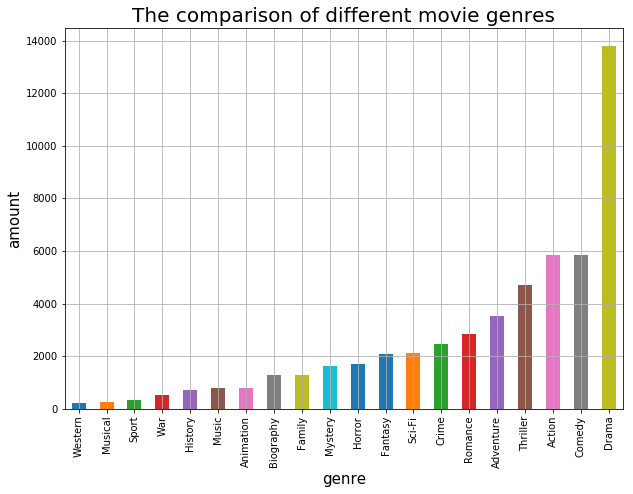

In [5]:
# The comparison of different movie genres

plt.rcParams['font.sans-serif'] = ['Simhei']

plt.rcParams['axes.unicode_minus']=False

total.plot(kind='bar',figsize=(10,7),width=0.5)

plt.title('The comparison of different movie genres',fontsize=20)

plt.ylabel('amount',fontsize=15)

plt.xlabel('genre',fontsize=15)

plt.grid(True)

plt.show()

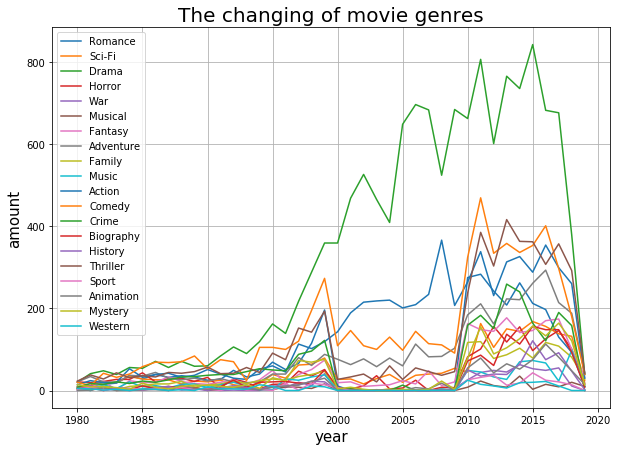

In [6]:
# The changing of movie genres

genresDf=genresDf[genresList]

genresDf.plot(figsize=(10,7))

plt.title('The changing of movie genres',fontsize=20)

plt.xlabel('year',fontsize=15)

plt.ylabel('amount',fontsize=15)

plt.grid(True)

plt.show()


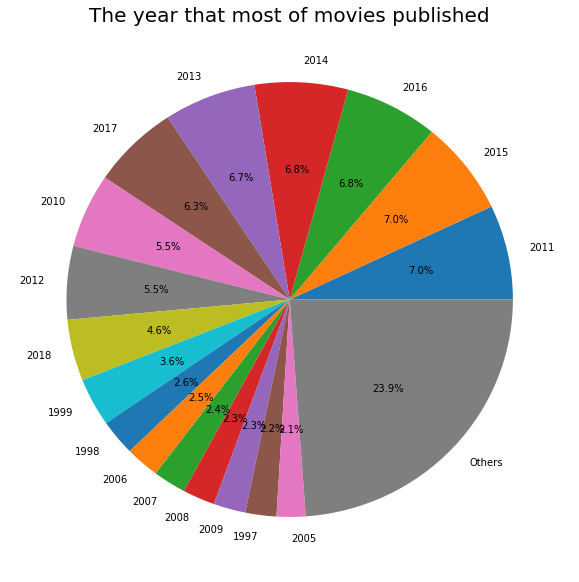

In [7]:
#The year that most of movies published

year_df=df['publish_year'].value_counts()

year_df=year_df/year_df.sum()

year_df2=year_df[year_df>=0.02]

year_df2['Others']=year_df[year_df<0.02].sum()

year_df2.plot(kind='pie',label='',startangle=0,shadow=False,

figsize=(10,10),autopct="%1.1f%%")

plt.title('The year that most of movies published',fontsize='20')

plt.show()

In [8]:
# Correlation Analysis

df_nn=df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
print(df_nn.corr())
x = df_nn.corr()
# plt.imshow(x)
xlabels=['genre_id','med_rating','imdb_rating','vote_count','budget','revenue', 'co_id','star_count','publish_year','publish_month']
ylabels=['genre_id','med_rating','imdb_rating','vote_count','budget','revenue', 'co_id','star_count','publish_year','publish_month']

# sns.set()
# f, ax = plt.subplots(figsize=(15, 8))
# sns.heatmap(x,cmap="YlGnBu", annot=True)
# plt.setp(xlabels, rotation=360, horizontalalignment='right')
# label_x = ax.get_xticklabels()
# plt.setp(ylabels, rotation=45, horizontalalignment='right')
# plt.show()


               genre_id  med_rating  imdb_rating  vote_count    budget  \
genre_id       1.000000    0.061279     0.052117   -0.072324 -0.019549   
med_rating     0.061279    1.000000     0.734379    0.253570  0.020764   
imdb_rating    0.052117    0.734379     1.000000    0.410767  0.046239   
vote_count    -0.072324    0.253570     0.410767    1.000000  0.026047   
budget        -0.019549    0.020764     0.046239    0.026047  1.000000   
revenue       -0.049602    0.098192     0.170233    0.635103  0.030846   
co_id          0.053715    0.015843    -0.016276   -0.060553  0.020806   
star_count    -0.003234    0.019344     0.100005    0.333484 -0.003295   
publish_year   0.034615    0.022059    -0.027854    0.030665  0.027746   
publish_month  0.049037    0.110172     0.114250    0.030355  0.019599   

                revenue     co_id  star_count  publish_year  publish_month  
genre_id      -0.049602  0.053715   -0.003234      0.034615       0.049037  
med_rating     0.098192  0.0158

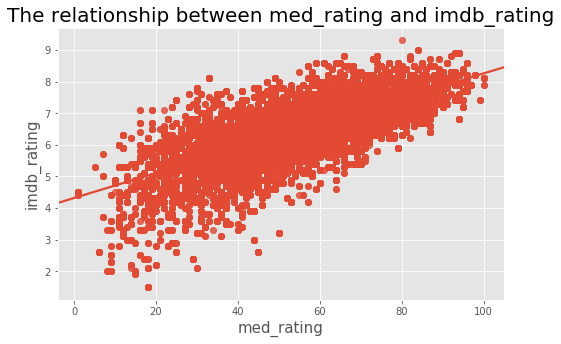

In [9]:
#The relationship between media rating and imdb user rating

plt.style.use('ggplot')

f,ax=plt.subplots(figsize=(8,5))

sns.regplot(x='med_rating',y='imdb_rating',data=df,ax=ax)

plt.title('The relationship between med_rating and imdb_rating',fontsize='20')

plt.xlabel('med_rating',fontsize='15')

plt.ylabel('imdb_rating',fontsize='15')

plt.grid(True)

plt.savefig('The relationship between med_rating and imdb_rating.jpg',bbox_inches='tight')


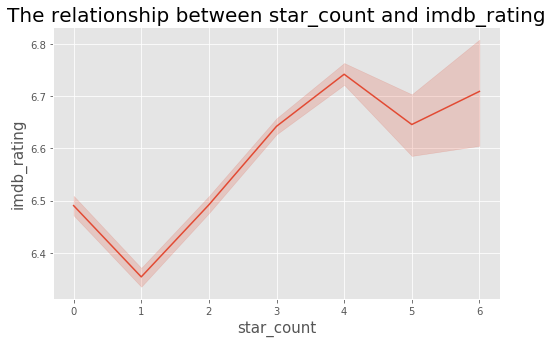

In [10]:
#The relationship between the number of stars and imdb user rating

plt.style.use('ggplot')

f,ax=plt.subplots(figsize=(8,5))

sns.lineplot(x="star_count", y="imdb_rating", data=df)
#sns.lineplot(df.publish_month)
#x='publish_month',y='imdb_rating'(data=df,ax=ax),

plt.title('The relationship between star_count and imdb_rating',fontsize='20')

plt.xlabel('star_count',fontsize='15')

plt.ylabel('imdb_rating',fontsize='15')

plt.grid(True)

plt.savefig('The relationship between star_count and imdb_rating.jpg',bbox_inches='tight')

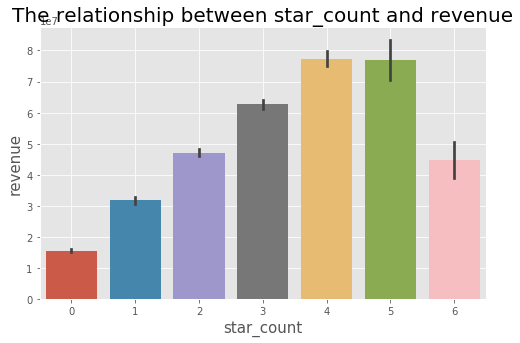

In [11]:
#The relationship between the number of stars and revenue

plt.style.use('ggplot')

f,ax=plt.subplots(figsize=(8,5))

df1 = df[df["publish_year"]>2015]

sns.barplot(x="star_count", y="revenue", data=df)

plt.title('The relationship between star_count and revenue',fontsize='20')

plt.xlabel('star_count',fontsize='15')

plt.ylabel('revenue',fontsize='15')

plt.grid(True)

plt.savefig('The relationship between star_count and revenue.jpg',bbox_inches='tight')

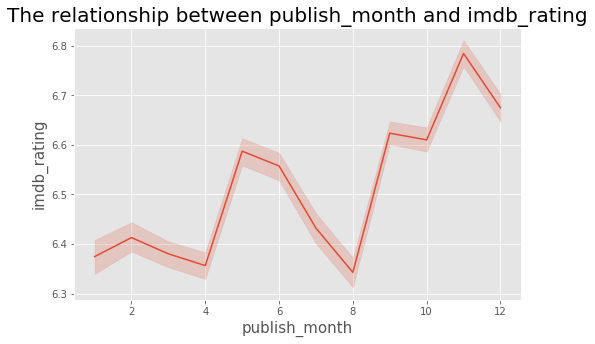

In [12]:
#The relationship between publish month and imdb user rating

plt.style.use('ggplot')

f,ax=plt.subplots(figsize=(8,5))

sns.lineplot(x="publish_month", y="imdb_rating", data=df)

plt.title('The relationship between publish_month and imdb_rating',fontsize='20')

plt.xlabel('publish_month',fontsize='15')

plt.ylabel('imdb_rating',fontsize='15')

plt.grid(True)

plt.savefig('The relationship between publish_month and imdb_rating.jpg',bbox_inches='tight')

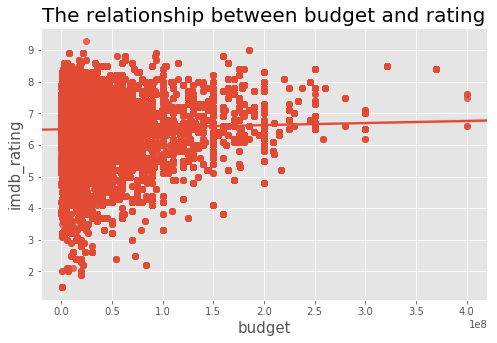

In [13]:
# The relationship between budget and rating

x1 = df[['budget','imdb_rating']]
x1 = x1[x1["budget"]<500000000]
x1 = x1[x1["budget"]>0]

x1=x1.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

plt.style.use('ggplot')

f,ax=plt.subplots(figsize=(8,5))

sns.regplot(x='budget',y='imdb_rating',data=x1,ax=ax)

plt.title('The relationship between budget and rating',fontsize='20')

plt.xlabel('budget',fontsize='15')

plt.ylabel('imdb_rating',fontsize='15')

plt.grid(True)

plt.show()

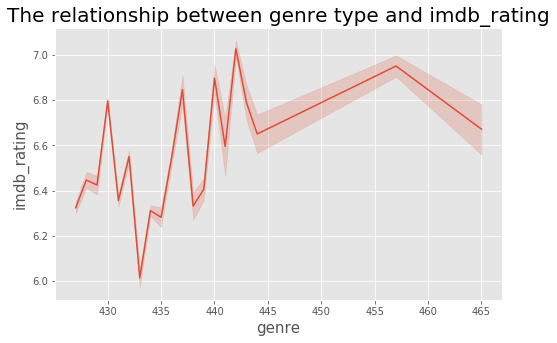

In [14]:
#The relationship between genre type and imdb_rating

plt.style.use('ggplot')

f,ax=plt.subplots(figsize=(8,5))

sns.lineplot(x="genre_id", y="imdb_rating", data=df)

plt.title('The relationship between genre type and imdb_rating',fontsize='20')

plt.xlabel('genre',fontsize='15')

plt.ylabel('imdb_rating',fontsize='15')

plt.grid(True)

plt.savefig('The relationship between genre type and imdb_rating.jpg',bbox_inches='tight')

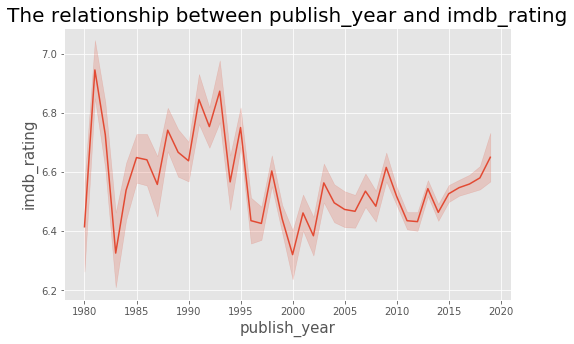

In [15]:
#The relationship between publish_year and imdb_rating

plt.style.use('ggplot')

f,ax=plt.subplots(figsize=(8,5))

sns.lineplot(x="publish_year", y="imdb_rating", data=df)

plt.title('The relationship between publish_year and imdb_rating',fontsize='20')

plt.xlabel('publish_year',fontsize='15')

plt.ylabel('imdb_rating',fontsize='15')

plt.grid(True)

plt.savefig('The relationship between publish_year and imdb_rating.jpg',bbox_inches='tight')

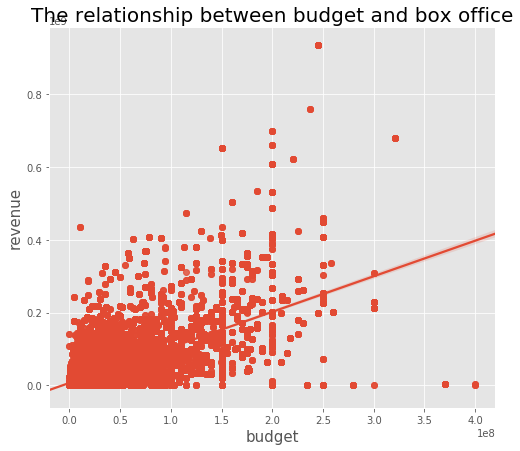

In [16]:
#The relationship between budget and box office

x2 = df[['budget','revenue']]
x2 = x2[x2["budget"]<500000000]
x2 = x2[x2["budget"]>0]

x2=x2.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
plt.style.use('ggplot')

f,ax=plt.subplots(figsize=(8,7))

sns.regplot(x='budget',y='revenue',data=x2,ax=ax)

plt.title('The relationship between budget and box office',fontsize='20')

plt.xlabel('budget',fontsize='15')

plt.ylabel('revenue',fontsize='15')

plt.grid(True)

plt.show()

In [28]:
X = df[['med_rating','genre_id','star_count']]
Y = df[['imdb_rating']]

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(39431, 3)
(39431, 1)
(13144, 3)
(13144, 1)


In [30]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.intercept_)
print(linreg.coef_)

[3.65268237]
[[0.03918381 0.00131582 0.0588046 ]]


In [31]:
X = df[['med_rating','genre_id','star_count']]
y = df[['imdb_rating']]
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
predicted = cross_val_predict(linreg, X, y, cv=10)
# 用scikit-learn计算MSE
print("MSE:",metrics.mean_squared_error(y, predicted))
# 用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y, predicted)))

MSE: 0.4036239951524583
RMSE: 0.6353140917313721


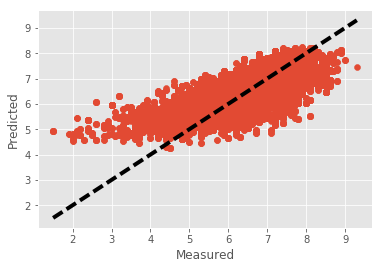

In [32]:
fig, ax = plt.subplots()
ax.scatter(Y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [60]:
x = linreg.intercept_
y = linreg.coef_
avengers = [77, 429, 6]
score = x[0] + sum(avengers * y[0])
print('The predicted score for avengers is', score)

The predicted score for avengers is 7.5871516293415375
